# Lab 6 - Bayesian Classifier and Gaussian Mixture Models

In the 5th assigment of the class we will study the Bayes Classifier.  

We will start with a quick demonstration of Gaussian Mixture Models with sklearn.

You have to implement two different variants of the bayes classifier using the assumption that the conditional probability P(x|y):
   1. Gaussian Bayes Classifier. P(x|y) ~ Gaussian Distribution (Normal)
   2. Gaussian Mixture Bayes Classifier. P(x|y) ~ Gaussian Mixture Model

# A. Demonstration Gaussian mixture model

#### 1 . Probability density function (pdf) of Multivariate Gaussian Distribution:

$${ p(x_{1},\ldots ,x_{k}; \mu,\Sigma)= \mathcal{N}(\mathbf {x} | \mu, \Sigma)= {\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}}$$

$$\mathbf {x} \in \mathbb{R}^d \text{: feature vector} $$
$$\Sigma \in \mathbb{R}^{d \times d}  \text{: is the covariance matrix} $$
$$\mu \in \mathbb{R}^d \text{: mean of the distribution} $$

The value of the density at a particular point $\mathbf {x}$ represent the relative likelihood of observing that particular value.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal as mvn
from sklearn.mixture import GaussianMixture


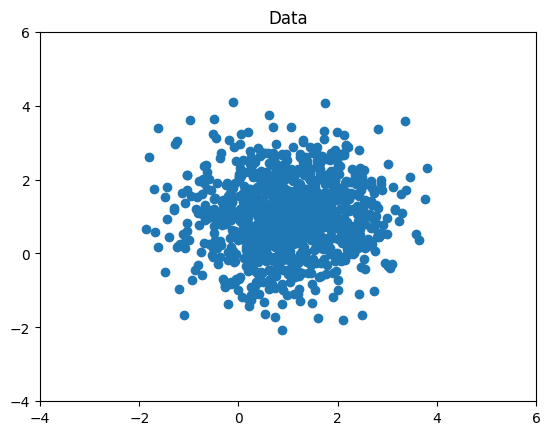

In [77]:
X = np.random.multivariate_normal(mean=[1, 1], 
                                  cov=[[1, 0],
                                       [0, 1]],
                                  size=1000)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-4,6)
plt.ylim(-4,6)
plt.title("Data")
plt.show()
plt.close()

To infer the parameter of the distribution we can simply estimate the mean and the covariance from the data

In [78]:
# example of the multi variate normal distribution with scipy
mean_est = np.mean(X,axis=0)
cov_est = np.cov(X, rowvar=False)

In [79]:
mean_est

array([1.00894922, 0.98475179])

In [80]:
cov_est

array([[0.9862391 , 0.04925599],
       [0.04925599, 1.02764304]])

In [81]:
from scipy.stats import multivariate_normal as mvn
dist = mvn(mean=mean_est, cov=cov_est)
x = [0, 0]
print("PDF:", dist.pdf(x))

PDF: 0.061712511622139546


#### 2. in the case of mixture of gaussian model the final Probability density function is as bellow:

$$p_{GMM}(x_{1},\ldots ,x_{d})= \sum_{i=1}^{k} w_k p(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$


The model can be fit using the EM algorithm to find our parameters :
 1. $ w_k $ : weight of each gaussian, or the prior probability of the gaussian k, p(k)
 1. $ \mu_k $ : the mean of each the gaussian 
 1. $ \Sigma_k $: the covariance of each gaussian

lets generate some data

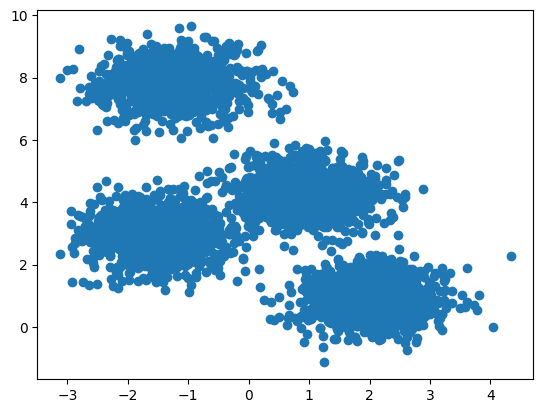

In [82]:
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt

# generate some data
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()
plt.close()

In [83]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X) # find the parameters of each gaussian

GaussianMixture(n_components=4)

In [84]:
# weights of each Gaussian i.e p(k)
w_k = gmm.weights_
w_k

array([0.24928842, 0.24995563, 0.25010392, 0.25065202])

In [85]:
# mean of each gaussian
means = gmm.means_
means

array([[ 0.95919476,  4.29696274],
       [-1.23824476,  7.81555656],
       [ 2.01630043,  0.90234062],
       [-1.5205758 ,  2.92071074]])

In [86]:
# mean of each gaussian
cov = gmm.covariances_
cov

array([[[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]],

       [[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]]])

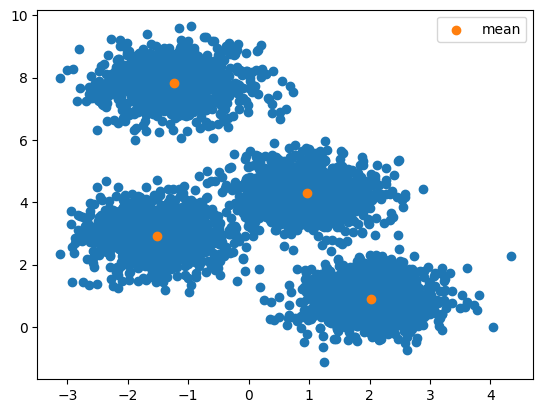

In [87]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], label="mean")
plt.legend()
plt.show()
plt.close()

# Probability Density Function of Gaussian Mixture Model

$$p_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k p(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$

In [88]:
# pdf of gmm
x = (0, 0)


def pdf_mixture(x, w, means, cov):
    n_componets = len(means)
    p_x = 0
    for k in range(n_componets):
        p_x += w[k] * mvn(mean=means[k], cov=cov[k]).pdf(x)
    return p_x

In [89]:
pdf_mixture(x, w_k, means, cov)

0.00010584089218250633

### notes 1.  if we use covariance_type="diag" the covariance metrix is diagonal

In [90]:
gmm = GaussianMixture(n_components=4, covariance_type="diag")
gmm.fit(X)

GaussianMixture(covariance_type='diag', n_components=4)

In [91]:
# so the cov in a list with the components of the diagonal
gmm.covariances_

array([[0.34120551, 0.34680435],
       [0.37956783, 0.33056489],
       [0.35218237, 0.34835942],
       [0.35306517, 0.36506761]])

# Assignment
## Bayesian Classifier with Gaussian Model

We begin with the implementation of the Gaussian Naive Bayes Classifier.

In the Bayesian Classifier, we use Bayes' theorem to calculate $ p(y|x) $:

$$ 
p(y|x) = \frac{p(x|y) \cdot p(y)}{p(x)} 
$$

This can be rewritten as:

$$ 
p(y|x) = \frac{p(x|y) \cdot p(y)}{\sum_{y'} p(x|y') p(y')} 
$$ 

In the Gaussian Naive Bayes Classifier, we assume that $ p(x|y) $ follows a Gaussian distribution: 

$$p(x|y) \sim \mathcal{N}(\mathbf {x} | \mu, \Sigma) $$

with the parameters $\mu$ and $\Sigma$ depending on the class $y$. 

In addition, the Naive Bayes classifier assumes **independence** of the features conditioned on the label, i.e., a **diagonal covariance matrix** for the Gaussian $ p(x|y) $.

So the Naive Bayes Classifier, you need to calculate:

1. The prior for each class $p(y)$ according to their empirical values.
2. The parameters of the Gaussian distribution for each class $y$ to model $ p(x|y) $ according to their empirical values.
3. Use Bayes' theorem to predict $ p(y|x) $.

The final prediction of our model can be the class with the maximum probability $p(y|x)$.

# Step 1.

Fill the class below and use it to:   
A. fit your model using .fit() method  
B. get the propabilities of each class for the different X using .predict_proba() method  
C. make the final predictions using the .predict() method and calculate the accuracy of your model  

Hints:
So to fit the model want:
1. Calculate the prior p(y) by calculating the percentage of samples in each class y.
2. Find the parameters (mean and covariance matrix) of the gaussian p(x|y) for **each class y**.   
We can do this by calculating the empirical mean and covariance matrix of Data X for each class y.
3. then use the bayes theorem to calculate p(y|x)

In [109]:
class GaussianNaiveBayesClassifier:


    def __init__(self):
        self.models = None   # p(x|y)
        self.prior = None    # p(y)
        self.classes = None  # the classes
        self.n_classes = None # number of classes
        self.n_features = None # dimension of the features

    def fit(self, X, y):
        self.n_features = X.shape[1]
        num_of_points = X.shape[0]
        
        self.classes = list(set(y))
        self.n_classes = len(self.classes)
        
        self.prior = np.zeros(self.n_classes)
        self.models = []
        
        for y_index, class_y in enumerate(self.classes):
            # 1. Calculate prior P(y)
            p_y = np.sum(y == class_y) / num_of_points
            self.prior[y_index] = p_y
            
            # 2. Calculate parameters for Gaussian P(x|y)
            data_x_y = X[y == class_y]  # Data for current class
            mean_x_y = np.mean(data_x_y, axis=0)
            cov_x_y = np.cov(data_x_y, rowvar=False)
            diag_cov_x_y = np.diag(np.diag(cov_x_y))  # Diagonal covariance
            
            # Gaussian distribution for class
            gaussian = mvn(mean=mean_x_y, cov=diag_cov_x_y)
            self.models.append(gaussian)  # Add Gaussian model to list

    def predict_proba(self, X):
        n_examples = X.shape[0]
        posterior = np.zeros((n_examples, self.n_classes))
        
        for y_index, model in enumerate(self.models):
            likelihood = model.pdf(X)  # P(x|y)
            posterior[:, y_index] = likelihood * self.prior[y_index]  # P(x|y) * P(y)
        
        # Normalize to get P(y|x)
        posterior /= posterior.sum(axis=1, keepdims=True)
        return posterior

    def predict(self, X):
        posterior = self.predict_proba(X)
        prediction = np.argmax(posterior, axis=1)
        return prediction

In [110]:
# Generate some sample data for training
from sklearn.datasets import make_blobs

# Generate synthetic data for two classes
centers = [(-10, 5), (0, 0), (0, 10), (-7, 10)]
X_y_0, _ = make_blobs(n_samples=4000, centers=centers, cluster_std=1.00, random_state=0)
centers = [(-5, 5), (-5, -2)]
X_y_1, _ = make_blobs(n_samples=2000, centers=centers, cluster_std=1.00, random_state=0)

X = np.concatenate([X_y_0, X_y_1], axis=0)
y = np.concatenate([[0] * 4000, [1] * 2000], axis=0)

# Initialize and fit the classifier
gaussian_naive_bayes = GaussianNaiveBayesClassifier()
gaussian_naive_bayes.fit(X=X, y=y)

# Predict probabilities for each class
posterior = gaussian_naive_bayes.predict_proba(X)
print("Posterior probabilities:\n", posterior)

# Predict the classes
y_pred = gaussian_naive_bayes.predict(X)

# Check the model accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y, y_pred=y_pred)
print("Accuracy of the model:", accuracy)

Posterior probabilities:
 [[9.99989565e-01 1.04354787e-05]
 [9.99565729e-01 4.34271483e-04]
 [9.35162411e-01 6.48375888e-02]
 ...
 [3.58796337e-01 6.41203663e-01]
 [5.32242871e-01 4.67757129e-01]
 [4.34743148e-01 5.65256852e-01]]
Accuracy of the model: 0.9421666666666667


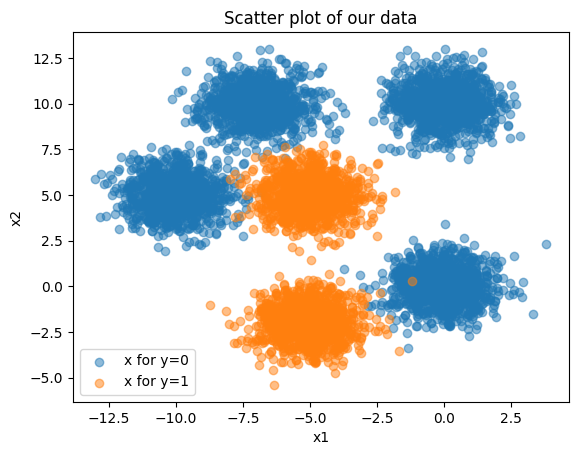

In [111]:
# plt.scatter(X[:,0], X[:,1], color =["r" if y == 1 else "g" for y in Y], alpha = 0.5)
plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_0[:, 0], X_y_0[:, 1], alpha=0.5, label="x for y=0")
plt.scatter(X_y_1[:, 0], X_y_1[:, 1], alpha=0.5, label="x for y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [120]:
# initial the classifier object
gaussian_naive_bayes = GaussianNaiveBayesClassifier()

# fit the model
gaussian_naive_bayes.fit(X=X,y=Y)

In [96]:
# get predict propabilities for each class
posterior = gaussian_naive_bayes.predict_proba(X)
print("Posterior probabilities:\n", posterior)

Posterior probabilities:
 [[9.99989565e-01 1.04354787e-05]
 [9.99565729e-01 4.34271483e-04]
 [9.35162411e-01 6.48375888e-02]
 ...
 [3.58796337e-01 6.41203663e-01]
 [5.32242871e-01 4.67757129e-01]
 [4.34743148e-01 5.65256852e-01]]


In [97]:
# get predict propabilities for each class
y_pred = gaussian_naive_bayes.predict(X)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = Y, y_pred=y_pred)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y, y_pred=y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9421666666666667


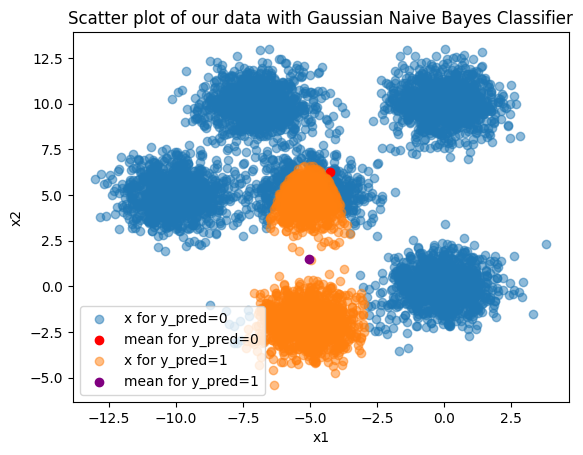

In [99]:
# Calculate means for plotting
mean_0 = gaussian_naive_bayes.models[0].mean
X_y_pred_0 = X[y_pred == 0]

mean_1 = gaussian_naive_bayes.models[1].mean
X_y_pred_1 = X[y_pred == 1]

# Plot results
plt.figure()
plt.title("Scatter plot of our data with Gaussian Naive Bayes Classifier")
plt.scatter(X_y_pred_0[:, 0], X_y_pred_0[:, 1], alpha=0.5, label="x for y_pred=0")
plt.scatter(mean_0[0], mean_0[1], label="mean for y_pred=0", color="red")
plt.scatter(X_y_pred_1[:, 0], X_y_pred_1[:, 1], alpha=0.5, label="x for y_pred=1")
plt.scatter(mean_1[0], mean_1[1], label="mean for y_pred=1", color="purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Step 2.  Bayesian Classifier with Gaussian mixture model

Implement the Bayesian Classifier with Gaussian mixture model.
The model is as before, but instead of using the Gaussian Distribution to model the P(x|y) for each class, we use a mixture of Gaussian's.

So you have to find the parameters of a GMM ($w_k$, $m_k$, $cov_k$) for each different y.  
note: To fit the gmm of each class y you can use the sklearn as we demonstrate before

Fill the class below and use it to get:  
1. fit your model using .fit() method
2. the propabilities of each class for the different x using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model
4. compare the result with the gaussian bayes classifier

First we will create a class for GMM to have the same API as scipy multivariate gausssian in order to change the minim in our code

In [100]:
class GMM(object):
    def __init__(self, mean, cov, w):
        self.k = len(means)  # components
        self.mean = mean
        self.cov = cov
        self.w = w

    def pdf(self, x):
        p_x = 0
        for k in range(self.k):
            p_x += self.w[k] * mvn(mean=self.mean[k], cov=self.cov[k]).pdf(x)
        return p_x

In [112]:

class GaussianMixtureNaiveBayesClassifier:
    def __init__(self):
        self.models = []   # List to store GMMs for each class
        self.prior = None  # Prior probabilities P(y)
        self.classes = None # Unique classes
        self.n_classes = None # Number of classes
        self.n_features = None # Number of features in X

    def fit(self, X, y, n_components):
        self.n_features = X.shape[1]
        num_of_points = X.shape[0]
        
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        
        self.prior = np.zeros(self.n_classes)
        
        for y_index, class_y in enumerate(self.classes):
            # 1. Calculate prior P(y)
            p_y = np.sum(y == class_y) / num_of_points
            self.prior[y_index] = p_y
            
            # 2. Fit GMM to data for current class
            data_x_y = X[y == class_y]
            gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
            gmm.fit(data_x_y)
            
            # Extract parameters from fitted GMM
            w_y = gmm.weights_
            mean_x_y = gmm.means_
            cov_x_y = gmm.covariances_  # diagonal covariances
            
            # Store GMM model for the class
            self.models.append(GMM(mean=mean_x_y, cov=cov_x_y, w=w_y))

    def predict_proba(self, X):
        n_examples = X.shape[0]
        posterior = np.zeros((n_examples, self.n_classes))
        
        for y_index, model in enumerate(self.models):
            likelihood = model.pdf(X)  # P(x|y) from GMM model
            posterior[:, y_index] = likelihood * self.prior[y_index]  # P(x|y) * P(y)
        
        # Normalize to get P(y|x)
        posterior /= posterior.sum(axis=1, keepdims=True)
        return posterior

    def predict(self, X):
        posterior = self.predict_proba(X)
        prediction = np.argmax(posterior, axis=1)
        return prediction

In [113]:
# Generate synthetic data for two classes
centers = [(-10, 5), (0, 0), (0, 10), (-7, 10)]
X_y_0, _ = make_blobs(n_samples=4000, centers=centers, cluster_std=1.00, random_state=0)
centers = [(-5, 5), (-5, -2)]
X_y_1, _ = make_blobs(n_samples=2000, centers=centers, cluster_std=1.00, random_state=0)

X = np.concatenate([X_y_0, X_y_1], axis=0)
y = np.concatenate([[0] * 4000, [1] * 2000], axis=0)# initial the classifier object

# Initialize and fit the Gaussian Mixture Naive Bayes classifier
gaussian_mixture_nb = GaussianMixtureNaiveBayesClassifier()
gaussian_mixture_nb.fit(X=X, y=y, n_components=10)

In [114]:
# Predict probabilities for each class
predicted_proba = gaussian_mixture_nb.predict_proba(X)
print("Predicted probabilities for each class:\n", predicted_proba)

Predicted probabilities for each class:
 [[9.99999982e-01 1.84067350e-08]
 [1.00000000e+00 4.72921139e-15]
 [1.00000000e+00 1.70076740e-15]
 ...
 [3.38527174e-05 9.99966147e-01]
 [2.39300272e-07 9.99999761e-01]
 [2.23406761e-06 9.99997766e-01]]


In [115]:
# Verify the probabilities sum to 1 across classes
print("Check sum across classes (should be close to 1):", predicted_proba.sum(axis=1))

Check sum across classes (should be close to 1): [1. 1. 1. ... 1. 1. 1.]


In [116]:
# Predict the classes
y_pred = gaussian_mixture_nb.predict(X)

In [117]:
# Check the model accuracy
accuracy = accuracy_score(y_true=y, y_pred=y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9893333333333333


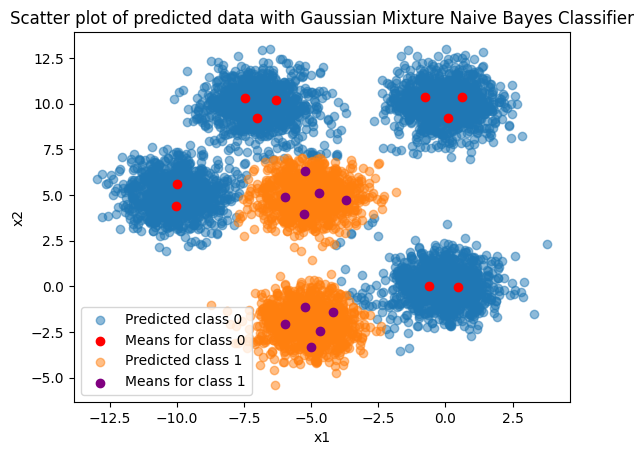

In [118]:
# Plot results
mean_0 = gaussian_mixture_nb.models[0].mean
X_y_pred_0 = X[y_pred == 0]

mean_1 = gaussian_mixture_nb.models[1].mean
X_y_pred_1 = X[y_pred == 1]

plt.figure()
plt.title("Scatter plot of predicted data with Gaussian Mixture Naive Bayes Classifier")
plt.scatter(X_y_pred_0[:, 0], X_y_pred_0[:, 1], alpha=0.5, label="Predicted class 0")
plt.scatter(mean_0[:, 0], mean_0[:, 1], label="Means for class 0", color="red")
plt.scatter(X_y_pred_1[:, 0], X_y_pred_1[:, 1], alpha=0.5, label="Predicted class 1")
plt.scatter(mean_1[:, 0], mean_1[:, 1], label="Means for class 1", color="purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

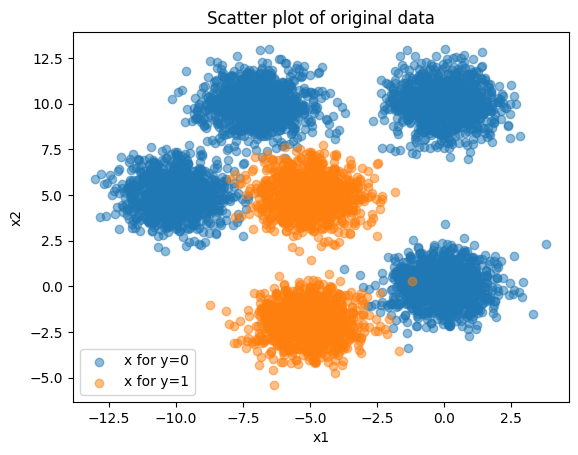

In [119]:
# Plot original data for comparison
plt.figure()
plt.title("Scatter plot of original data")
plt.scatter(X_y_0[:, 0], X_y_0[:, 1], alpha=0.5, label="x for y=0")
plt.scatter(X_y_1[:, 0], X_y_1[:, 1], alpha=0.5, label="x for y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()